1. Import the required Libraries

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash during Quantile Transformation
warnings.filterwarnings('ignore')

2. Loading the Dataset

In [39]:
df = pd.read_csv("diabetes.csv")

Understanding the dataset:

i) Head of the dataset

ii) Shape of the data set

iii) Types of columns

iv) Information about data set

v) Summary of the data set

In [40]:
df.head() #top 5 columns of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.shape #size of the dataset i.e. number of rows and columns

(768, 9)

In [42]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [44]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Conclusion: We observe that min value of some columns is 0 which cannot be possible medically. Hence in the data cleaning process, we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

3. Data Cleaning

In [45]:
df=df.drop_duplicates() #checking if there are any duplicate values and dropping them

In [46]:
df.isnull().sum() #check for missing (null) values and print their sum column wise

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Conclusion: There are no missing values as the sum is 0 for every column

In [47]:
#Checking for 0 values in these 5 columns: BloodPressure, Glucose, SkinThickness, Insulin, BMI
#Age and DiabetesPedigree function do ot have minimum value 0 so no need to replace
#No. of pregnancies can be 0 for a person so no need to replace that as well

print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


Some of the columns have a skewed distribution. The MEAN is more affected by outliers than the MEDIAN. 
Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. 
SkinThickness, Insulin, BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

Refer Histograms down below to see the distribution.

In [48]:
#replacing 0 values with mean or median of that column

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean()) #normal distribution
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean()) #normal distribution
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median()) #skewed distribution
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median()) #skewed distribution
df['BMI'] = df['BMI'].replace(0,df['BMI'].median()) #skewed distribution

4. Data Visualization

Here we are going to plot:

i) Count Plot :- to see if the dataset is balanced or not

ii) Histograms :- to see if data is normally distributed or skewed

iii) Box Plots :- to analyse the distribution and see the outliers

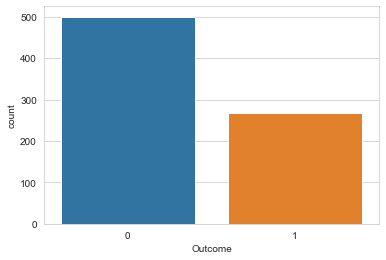

In [49]:
#count plot
sns.countplot('Outcome',data=df)

Conclusion: We can clearly see that the data is imbalanced. (People who do not have diabetes is more than the people who do.)

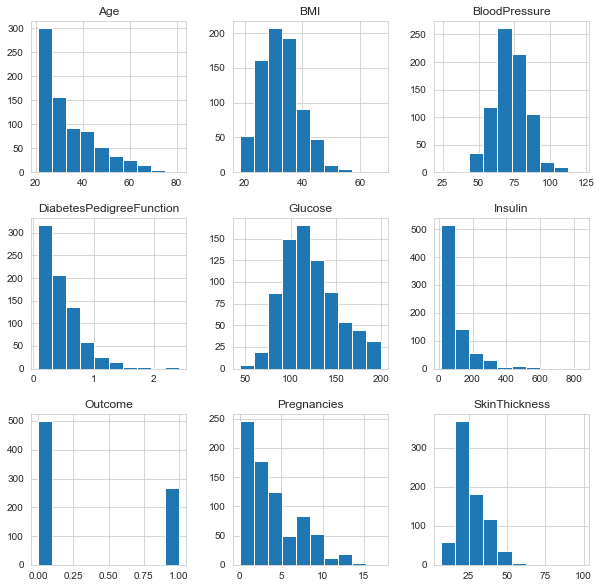

In [50]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

Conclusion: We can see that only glucose and bloodpressure have normal distribution. Rest are skewed and have outliers.

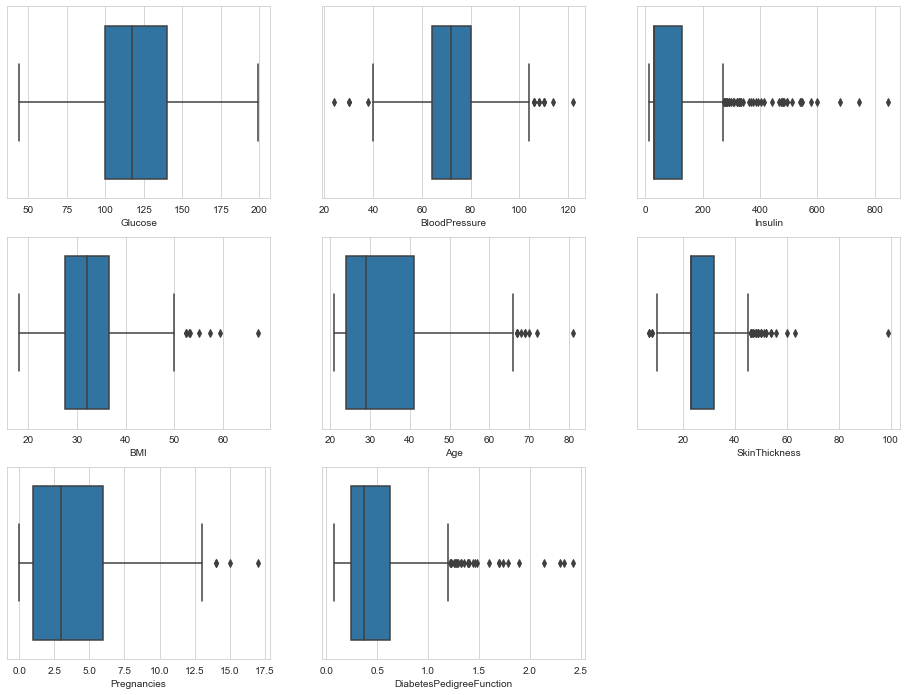

In [51]:
#Box plots
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Conclusion :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

5. Feature Selection

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 

1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

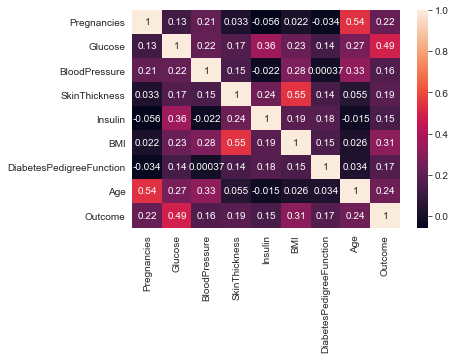

In [52]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

Conclusion: If we notice the last row 'Outcome' and note its correlation scores with different features, we can see that 'Glucose', 'BMI' and 'Age' have higher correlation. They are more correlated to the 'Outcome' as their values more towards 1. Whereas, 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction' are the least correlated, hence they don't contribute much to the model so we can drop them. 

In [53]:
#introducing new variable df_selected to store only the columns taken under consideration
df_selected = df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

6. Handling Outliers

What is an Outlier?
An outlier is a data point in a data set that is distant from all other observations.

Identifying them:
We can use several methods to identify the outliers. One of them is by using box plots. As we have plotted the distribution using box plots earlier, we can see that all the features except blood pressure and Glucose had outliers.

Treating the Outliers:
Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [54]:
from sklearn.preprocessing import QuantileTransformer
x = df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
#introducing new variable df_new to store the transformed data
df_new = quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


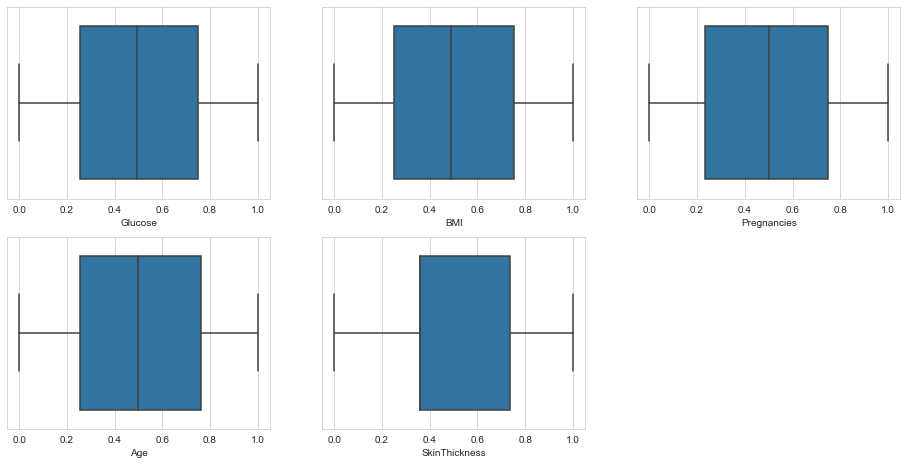

In [55]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

Conclusion: We can see that we have cleared the outliers

5. Split the data frames into x and y. x denotes the input and y denotes the output.

In [56]:
#target_name = 'Outcome'
y = df_new.Outcome #given predictions - training data 
x = df_new.drop('Outcome', axis=1) #dropping the Outcome column and keeping all other columns as X

In [57]:
x.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [58]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

7. Training Testing Split 

Using the thumb rule to split the training-testing data:
80% training data and 20% testing data

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0) #splitting data in 80% train, 20%test

In [60]:
x_train.shape,y_train.shape

((614, 5), (614,))

In [61]:
x_test.shape,y_test.shape

((154, 5), (154,))

8. Classification algorithms

(Ideally we should use different models and compare the accuracy and then use the one with the highest accuracy, but here to make the project a little less complex I have used just Lgistic Regression. Other algorithms that could have been used are k nearest neighbour, naive bayes, SVM (Support Vector Machine), Decision Tree, etc.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [63]:
model = LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [64]:
y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred) #checking the accuracy
print(score)

0.7922077922077922


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



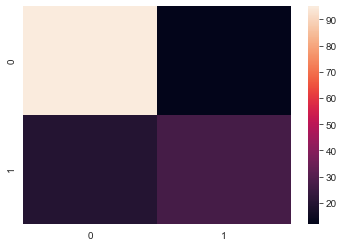

In [65]:
print("Classification Report is:\n", classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

Diabetes Predictor using Logistic Regression

In [66]:
df_new.dtypes

Pregnancies      float64
Glucose          float64
SkinThickness    float64
BMI              float64
Age              float64
Outcome          float64
dtype: object

In [97]:
#input1, input2, input3, input4, input5
def detection(input):
    tfidf_train = tfidf_vectorizer.fit_transform(x_train)
    tfidf_test = tfidf_vectorizer.transform(x_test)
    ip = [input]
    vect_ip = tfidf_vectorizer.transform(ip)
    pred = model.predict(vect_ip)
    if(pred == 0):
        print("Negative")
    else:
        print("Positive")

In [98]:
#1 89 23 28.1 21
detection("1,89,23,28,21")

Negative


In [99]:
#0 137 35 43.1 33
detection("0,137,35,43.1,33")

Negative
